# Doğrusal Regresyon (Linear Regression)


Amaç bağımlı ve bağımsız değişken/değişkenler arasındaki ilişkiyi doğrusal olarak modellemektir.
<img src="https://womaneng.com/wp-content/uploads/2018/12/Ekran-Resmi-2018-12-23-21.21.32.png">
<br>


## Ağırlıkların Bulunması

- Gerçek değerle tahmin edilen değerlerin arasındaki farkların karelerinin toplamını/ortalamasının minimum yapacak b ve w değerlerini bulmaktadır.


## Regresyon Modellerinin Başarı Değerlendirme (MSE,RMSE,MAE)

- MSE: Mean Squared Error
  <img src = "https://miro.medium.com/max/1268/1*k34VPhcncWOmkMw3RQHjdw.png">

<br>
- RMSE: Root Mean Squared Error
<br>
 <img src="https://editor.analyticsvidhya.com/uploads/69457rmse.png">

 <br>
- MAE: Mean Absolute Error
<br>
 <img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F258363%2F7bdebc3b6300dfdd7686c18c131e80f0%2FMAE.png?generation=1594467137394270&alt=media">


## Parametrelerin tahmin edilmesi

- Analitik Çözüm: Normal Denklemler Yöntemi (En Küçük Kareler)

**Simple linear regression**
<img src="https://miro.medium.com/max/584/1*BDnev89iHmFqbB-HY1MuRQ.png">

**Multiple linear regression**
<img src="https://veribilimcisi.files.wordpress.com/2017/07/formul_h_teta.png">

<img src="https://veribilimcisi.files.wordpress.com/2017/07/x_j_i.png?w=48&zoom=2"> = i. eğitim verisinin özelliklerinin değeri
<br>
<img src="https://veribilimcisi.files.wordpress.com/2017/07/x_i_.png?w=42&zoom=2"> = i. eğitim verisinin özellik girdisi
<br>
m = eğitin verilerinin sayısı
<br>
n = özelliklerin sayısı

- Optimizasyon Çözümü (Gradient Descent)

<img src="https://miro.medium.com/max/450/1*8Omixzi4P2mnqdsPwIR1GQ.png">


## Doğrusal Regresyon İçin Gradient Descent

- Gradyanın negatifi olarak tanımlanan 'en dik iniş' yönünde iteratif olarak parametre değerlerini güncelleyerek ilgili fonksiyonun minimum değerini verebilecek parametreleri bulmaktadır.
- Cost fonksiyonunu minimize edecek parametreleri bulmak için kullanılır.


## Basit Doğrusal Regresyon Modeli


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [5]:
df = pd.read_csv("datasets/advertising.csv")
df.head()


,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [6]:
df.shape


(200, 4)

In [10]:
X = df[["TV"]]
Y = df[["sales"]]
X.head()


,TV
0,230.10
1,44.50
2,17.20
3,151.50
4,180.80


In [11]:
Y.head()


,sales
0,22.10
1,10.40
2,9.30
3,18.50
4,12.90


**Model**


In [13]:
regModel = LinearRegression().fit(X, Y)
#sabit (b- bians)
regModel.intercept_[0]


7.032593549127693

In [14]:
regModel.coef_[0][0]


0.047536640433019764

**Tahmin**


In [15]:
# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

regModel.intercept_[0] + regModel.coef_[0][0]*150


14.163089614080658

In [16]:
# 500 birimlik tv harcaması olsa ne kadar satış olur?

regModel.intercept_[0] + regModel.coef_[0][0]*500

df.describe().T


,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


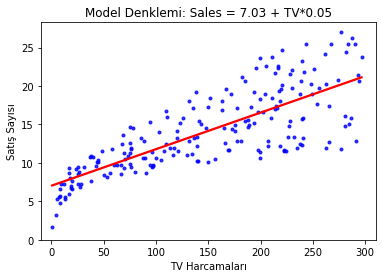

In [18]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=Y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(
    f"Model Denklemi: Sales = {round(regModel.intercept_[0], 2)} + TV*{round(regModel.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()


**Tahmin Başarısı**


In [27]:
yPred = regModel.predict(X)
mean_squared_error(Y, yPred)
# 10.51
Y.mean()
Y.std()


sales   5.22
dtype: float64

In [29]:
# RMSE
np.sqrt(mean_squared_error(Y, yPred))
# 3.24


3.2423221486546887

In [31]:

# MAE
mean_absolute_error(Y, yPred)
# 2.54


2.549806038927486

In [32]:
# R-KARE
regModel.score(X, Y)


0.611875050850071

**Multiple Linear Regression**


In [33]:
df = pd.read_csv("datasets/advertising.csv")

X = df.drop('sales', axis=1)

y = df[["sales"]]


**Model**


In [38]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1)

y_test.shape


(40, 1)

In [39]:
y_train.shape


(160, 1)

In [36]:

regModel = LinearRegression().fit(X_train, y_train)

# sabit (b - bias)
regModel.intercept_


array([2.90794702])

In [37]:
# coefficients (w - weights)
regModel.coef_


array([[0.0468431 , 0.17854434, 0.00258619]])

**Tahmin**


In [41]:
# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# 2.90
# 0.0468431 , 0.17854434, 0.00258619

# Sales = 2.90  + TV * 0.04 + radio * 0.17 + newspaper * 0.002

2.90794702 + 30 * 0.0468431 + 10 * 0.17854434 + 40 * 0.00258619


6.20213102

In [42]:
yeniVeri = [[30], [10], [40]]
yeniVeri = pd.DataFrame(yeniVeri).T

regModel.predict(yeniVeri)


array([[6.202131]])

**Tahmin Başarısını Değerlendirme**


In [43]:
# Train RMSE
yPred = regModel.predict(X_train)
np.sqrt(mean_squared_error(y_train, yPred))


1.736902590147092

In [44]:
# TRAIN RMAE
regModel.score(X_train, y_train)


0.8959372632325174

In [45]:
# Test RMSE
y_pred = regModel.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


1.4113417558581585

In [46]:
# Test RKARE
regModel.score(X_test, y_test)


0.8927605914615384

In [47]:
# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(regModel,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

# 1.69


1.6913531708051797

In [48]:
# 5 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(regModel,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))
# 1.71


1.7175247278732086

**Simple Linear Regression with Gradient Descent from Scratch**

In [49]:
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse


In [50]:
# updateWeights
def updateWeights(Y, b, w, X, learningRate):
    m = len(Y)
    bDerivSum = 0
    wDerivSum = 0
    for i in range(0, m):
        yHat = b + w * X[i]
        y = Y[i]
        bDerivSum += (yHat - y)
        wDerivSum += (yHat - y) * X[i]
    newB = b - (learningRate * 1 / m * bDerivSum)
    newW = w - (learningRate * 1 / m * wDerivSum)
    return newB, newW


# train fonksiyonu
def train(Y, initialB, initialW, X, learningRate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initialB, initialW,
                                                                   cost_function(Y, initialB, initialW, X)))

    b = initialB
    w = initialW
    costHistory = []

    for i in range(num_iters):
        b, w = updateWeights(Y, b, w, X, learningRate)
        mse = cost_function(Y, b, w, X)
        costHistory.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return costHistory, b, w





In [51]:
df = pd.read_csv("datasets/advertising.csv")

X = df["radio"]
Y = df["sales"]

# hyperparameters
learningRate = 0.001
initialB = 0.001
initialW = 0.001
num_iters = 100000

cost_history, b, w = train(Y, initialB, initialW, X, learningRate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25